# **Classifying newsgroup topics with Support Vector Machines**

---


\



# Importing libraries

*Libraries used :-*

1.   Sci-kit learn (machine learning library)
2.   Natural Language Toolkit (natural language processing library) also known as NLTK

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

Downloading required nltk library packages using  the command - nltk.download ('package_name')

In [2]:
import nltk
nltk.download('names')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

*Lemmatization is the process of grouping together different inflected forms of words having the same root or lemma for better NLP analysis and operations. The lemmatization algorithm removes affixes from the inflected words to convert them into the base words (lemma form). For example, “running” and “runs” are converted to its lemma form “run”.*

*Wordnet is a popular lexical database of the English language that is used by NLTK internally. WordNetLemmatizer is an NLTK lemmatizer built using the Wordnet database*
☑



In [3]:
all_names=set(names.words())
lemmatizer=WordNetLemmatizer()

def is_letter_only(word):
    return word.isalpha()

from nltk.corpus import stopwords
stop_words= stopwords.words('english')

In [4]:
def clean_text(docs):
    docs_cleaned=[]
    for doc in docs:
        doc=doc.lower()
        doc_cleaned=' '.join(lemmatizer.lemmatize(word) for word in doc.split()
                            if is_letter_only(word) and word not in all_names and word not in stop_words)
        docs_cleaned.append(doc_cleaned)
    return docs_cleaned

Fetching dataset 20newsgroups 

In [5]:
fetch_20newsgroups

<function sklearn.datasets._twenty_newsgroups.fetch_20newsgroups(*, data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True, return_X_y=False)>

In [12]:
cleaned_test = clean_text(data_test.data)
label_test = data_test.target

# ***Binary classification is a supervised machine learning technique where the goal is to predict categorical class labels which are discrete and unoredered such as Pass/Fail, Positive/Negative, etc.***

In [13]:
# Binary Classification 

categories= ['comp.graphics','sci.space']

data_train= fetch_20newsgroups(subset='train', categories= categories, random_state=42)
data_test= fetch_20newsgroups(subset='test', categories=categories, random_state=42)

cleaned_train= clean_text(data_train.data)
label_train= data_train.target

Tfidfvectorizer convert a collection of raw documents to a matrix of TF-IDF features.

And it is equivalent to CountVectorizer followed by TfidfTransformer.

In [14]:
# Tfidfvectorizer- term frequency inverse document frequency
from collections import Counter
Counter(label_train)

Counter({0: 584, 1: 593})

In [15]:
tfidf_vectorizer= TfidfVectorizer(stop_words='english',max_features=None)
term_docs_train= tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test=tfidf_vectorizer.transform(cleaned_test)

Importing Support Vector Machine from sklearn library using the command - from sklearn.svm import SVC (using linear svc here)

In [16]:
from sklearn.svm import SVC

svm=SVC(kernel='linear', random_state=42)
svm.fit(term_docs_train, label_train)
accuracy= svm.score(term_docs_test, label_test)
print("The accuracy of binary classification is : {0:.1f}%".format(accuracy*100))

The accuracy of binary classification is : 96.4%


**Our models accuracy of binary classification is 96.4%**

Multiclass classification is a popular problem in supervised machine learning.

Problem – Given a dataset of m training examples, each of which contains information in the form of various features and a label. Each label corresponds to a class, to which the training example belongs.

In [17]:
# Multiclass classification
categories=[
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
    'rec.sport.hockey'
]

Model for Multiclass classification

In [18]:
data_train= fetch_20newsgroups(subset='train', categories= categories, random_state=42)
data_test= fetch_20newsgroups(subset='test', categories=categories, random_state=42)

cleaned_train= clean_text(data_train.data)
label_train= data_train.target

cleaned_test= clean_text(data_test.data)
label_test= data_test.target

tfidf_vectorizer= TfidfVectorizer(stop_words='english',max_features=None)
term_docs_train= tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test=tfidf_vectorizer.transform(cleaned_test)

svm=SVC(kernel='linear', random_state=42)
svm.fit(term_docs_train, label_train)
accuracy= svm.score(term_docs_test, label_test)
print("The accuracy of 5-class classification is : {0:.1f}%".format(accuracy*100))

The accuracy of 5-class classification is : 88.6%


**Our models accuracy of Multiclass classification is 88.6%**

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       319
           1       0.92      0.96      0.94       389
           2       0.98      0.96      0.97       399
           3       0.93      0.94      0.93       394
           4       0.74      0.73      0.73       251

    accuracy                           0.89      1752
   macro avg       0.87      0.87      0.87      1752
weighted avg       0.89      0.89      0.89      1752



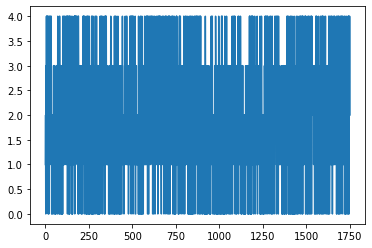

In [24]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
prediction= svm.predict(term_docs_test)
report= classification_report(label_test, prediction)
print(report)

plt.plot(prediction)
plt.show()